## Instrucciones

**El examen puede ser realizado en grupo de tres personas, sin embargo, cada integrante crear y ejecutar las tareas de actualización en su GitHub.**

A continuación, se encuentran las instrucciones para el desarrollo del examen de nuestro curso de Ciencias de Datos para la Economía, el cual es parte de su portfolio.

**Objetivo**: Que el/la estudiante utilice las herramientas de Git y posteriormente publicar su primer proyecto de ciencias de datos en GitHub.

A continuación encontrará el dataset **ingresos.txt** en la carpeta de **Datos**, el cual contiene información de variables que buscan predecir los ingresos anuales de los encuestados utilizando datos de encuestas de 1990.

El dataset tiene 1.816 filas y 14 columnas. A continuación se describen las columnas:

- estatura: Unidad de medida centímetros
- peso: Unidad de medida kilogramos
- genero
- ingresos: en dólares
- etnia: etnia en EE.UU.
- educacion: en años
- educacion_madre: en años
- educacion_padre: en años
- Camina: Camina al trabajo
  - 1: Nunca
  - 2: Una vez al mes o menos
  - 3: Alrededor de dos veces al mes
  - 4: Alrededor de una veces a la semana
  - 5: Dos veces a la semana
  - 6: Tres veces a la semana
  - 7: Mas de tres veces a la semana
  - 8: Todos los días
- ejercicio: días de la semana que practica ejercicios
- fumador: Fuma 7 cigarros o más a la semana
  - 1: Si
  - 2: No
- tenso: días de la semana en dicho estado
- malhumorado: : días de la semana en dicho estado
- edad: en años



**Tareas solicitadas:**

Con el set de datos  ingresos.txt, debe realizar las siguientes actividades tanto en Python, Git y GitHub.:

- Crear carpeta donde va a trabajar su proyecto


- Inicializar su proyecto en git

  **`git init`**

- Crear un cuaderno de jupyter notebook, ya sea en colab o en su computador, para realizar su actividad.


- Crear un archivo con nombre README.md
touch README.md

- Describa su proyecto en el archivo README.md utilizando lenguaje markdown o latex. Puede usar como ayuda gráfica la página web indicada en las slices vistas en clase.

- Realizar un análisis descriptivos y visualización de datos: Debe realizar tareas tales como, descripción de los datos, transformaciones en caso de ser necesario, imputación, entro otras.
Debe guardar su proyecto y agregar el archivo a Git y comentarlo.

  **`crt + s`**

  **`git add`**

  **`git commit`**

- Crear un repositorio remoto en GitHub con el nombre Ciencias de Datos:

- Conectarse desde su computador al repositorio remoto. No olvide enlazar su computador.
git remote add origin https://github.com/nombre_usuario/nombre_repositorio.git

  Otra alternativa es realizar el proyecto usanod colab.

- Crear rama principal en su computador

  **`git branch -M main`**

- Agregar cuaderno de jupyter a repositorio remoto

  **`git push -u origin main`**

- Crear nueva rama para la segunda parte del Proyecto.

  **`git branch`**

- Moverse a nueva rama para la segunda parte del Proyecto.

  **`git checkout`**

- Continuar con su tarea en jupyter notebook. Ahora deberá aplicar reducción de dimensionalidad usando el algoritmo PCA. No es necesario que realice los test estadístico, solamente explicarlos e indicar que se cumplen los supuestos.
Debe guardar su proyecto y agregar el archivo a Git y comentarlo.

  **`crt + s`**

  **`git add`**

  **`git commit`**

- Moverse a la rama principal y realizar merge a la rama creada.

  **`git merge`**

- Actualizar la rama principal de su repositorio remoto y agregar la rama creada

  **`git push origin main`**

  **`git push origin nombre_rama_2`**


- Finalmente, cada integrante debe agregar la url de su proyecto en el aulavirtual

**Fecha Entrega: Domingo 15 de Diciembre de 2024, 23:00 hrs.**


**Nota 1:** Los códigos y pasos indicados deben ser utilizados como referencia, ya que es posible que algún paso o comandos no se hayan indicado.

**Nota 2**: En caso de que no pueda generar el proyecto con las ramas solicitadas, puede cargar el proyecto con un solo push.

In [1]:
#@title Librerias

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from google.colab import drive

# Configuración para gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [2]:
#@title Carga de base de datos

# Montar Google Drive
drive.mount('/content/drive')

# Ruta al archivo
ruta_archivo = '/content/drive/My Drive/ingresos.txt'

# Cargar el dataset
df = pd.read_csv(ruta_archivo, delimiter='\t')

# Mostrar información básica
print("Información del dataset:")
df.info()

# Mostrar primeras filas
print("\nPrimeras filas del dataset:")
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   estatura         1816 non-null   float64
 1   peso             1789 non-null   float64
 2   genero           1816 non-null   object 
 3   ingresos         1816 non-null   float64
 4   etnia            1816 non-null   object 
 5   educacion        1814 non-null   float64
 6   educacion_madre  1572 non-null   float64
 7   educacion_padre  1521 non-null   float64
 8   camina           1816 non-null   int64  
 9   ejercicio        1816 non-null   int64  
 10  fumador          1815 non-null   float64
 11  tenso            1815 non-null   float64
 12  malhumorado      1815 non-null   float64
 13  edad             1816 non-null   int64  
dty

In [3]:
#@title Estadísticas Descriptivas

# Resumen estadístico del dataset
print("Estadísticas descriptivas:")
print(df.describe())

# Dimensiones del dataset
print("\nNúmero de filas y columnas:", df.shape)

# Tipos de datos por columna
print("\nTipos de datos por columna:")
print(df.dtypes)

# Valores únicos por columna
print("\nNúmero de valores únicos por columna:")
print(df.nunique())



Estadísticas descriptivas:
          estatura         peso       ingresos    educacion  educacion_madre  \
count  1816.000000  1789.000000    1816.000000  1814.000000      1572.000000   
mean    169.084835    70.898418   21147.296256    13.235391        13.608779   
std       9.732829    15.701936   22531.765123     2.556638         3.219372   
min     144.780000    36.290000       0.000000     2.000000         3.000000   
25%     162.560000    58.970000    6000.000000    12.000000        12.000000   
50%     167.640000    68.040000   16000.000000    12.000000        13.000000   
75%     175.895000    81.650000   27000.000000    15.000000        16.000000   
max     208.280000   155.130000  400000.000000    18.000000        99.000000   

       educacion_padre       camina    ejercicio      fumador        tenso  \
count      1521.000000  1816.000000  1816.000000  1815.000000  1815.000000   
mean         13.652202     5.303414     3.049009     1.745455     1.421488   
std           3.25

In [4]:
#@title Identificación de Valores Faltantes

# Valores nulos por columna
print("Valores nulos por columna:")
print(df.isnull().sum())




Valores nulos por columna:
estatura             0
peso                27
genero               0
ingresos             0
etnia                0
educacion            2
educacion_madre    244
educacion_padre    295
camina               0
ejercicio            0
fumador              1
tenso                1
malhumorado          1
edad                 0
dtype: int64


**Observaciones**

* Valores faltantes:
Hay valores nulos en las columnas peso, educacion, educacion_madre, y educacion_padre, ademas de valores nulos.
Las variables fumador, tenso y malhumorado tienen 1 valor faltante cada una.

Debemos modificar lo anterior dado que los modelos de regresión no pueden manejar datos faltantes, por lo tanto, imputaremos los datos con la mediana para las variables no categoricas, al ser más robusto a los datos lejanos o extremos. Por otra parte, imputaremos las variables categoricas con la moda.

* Variables categóricas:
Genero y etnia son variables categóricas. Las convertiemos en variables dummy

* Distribución de los datos:
Algunas columnas tienen valores extremos, como educacion_padre y madre con un max de 99. Por otra parte, ingresos tiene un máximo de $400000, podria tratarse de un valos atipico.

In [5]:
#@title Imputación de Valores Faltantes

# Imputar valores nulos
df['peso'].fillna(df['peso'].median(), inplace=True)
df['educacion'].fillna(df['educacion'].median(), inplace=True)
df['educacion_madre'].fillna(df['educacion_madre'].median(), inplace=True)
df['educacion_padre'].fillna(df['educacion_padre'].median(), inplace=True)

df['fumador'].fillna(df['fumador'].mode()[0], inplace=True)
df['tenso'].fillna(df['tenso'].mode()[0], inplace=True)
df['malhumorado'].fillna(df['malhumorado'].mode()[0], inplace=True)


print("Valores nulos después de la imputación:")
print(df.isnull().sum())



Valores nulos después de la imputación:
estatura           0
peso               0
genero             0
ingresos           0
etnia              0
educacion          0
educacion_madre    0
educacion_padre    0
camina             0
ejercicio          0
fumador            0
tenso              0
malhumorado        0
edad               0
dtype: int64


<ipython-input-5-c29f1bfb0519>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['peso'].fillna(df['peso'].median(), inplace=True)
<ipython-input-5-c29f1bfb0519>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [6]:
#@title Creación de Variables Dummy

# Crear variables dummy para 'genero', dejando 'Hombre' como base
genero_dummies = pd.get_dummies(df['genero'], drop_first=True)

# Convertir 'genero' en una variable binaria: 0 para 'Hombre', 1 para 'Mujer'
df['genero_binario'] = df['genero'].apply(lambda x: 0 if x == 'masculino' else 1)

# Convertir 'etnia' en una variable binaria: 0 para 'Blanco', 1 para cualquier otro
df['etnia_binaria'] = df['etnia'].apply(lambda x: 0 if x == 'Blanco' else 1)

# Eliminar las columnas originales 'genero' y 'etnia'
df = df.drop(columns=['genero', 'etnia'])

# Mostrar los primeros registros del DataFrame modificado para verificar
print(df.head())

   estatura   peso  ingresos  educacion  educacion_madre  educacion_padre  \
0    187.96  95.25   50000.0       16.0             16.0             16.0   
1    167.64  56.70   60000.0       16.0             16.0             16.0   
2    162.56  57.15   30000.0       16.0             16.0             16.0   
3    165.10  90.72   25000.0       17.0             17.0             13.0   
4    160.02  49.90   50000.0       16.0             16.0             16.0   

   camina  ejercicio  fumador  tenso  malhumorado  edad  genero_binario  \
0       3          3      2.0    0.0          0.0    45               0   
1       6          5      1.0    0.0          0.0    58               1   
2       8          1      2.0    1.0          1.0    29               1   
3       8          1      2.0    0.0          0.0    57               1   
4       5          6      2.0    0.0          0.0    91               1   

   etnia_binaria  
0              0  
1              0  
2              0  
3         

In [7]:
#@title Análisis de Outliers con el Método Tukey

# Función para calcular límites de Tukey
def calcular_limites_tukey(frame, variable):
    q1 = frame[variable].quantile(0.25)
    q3 = frame[variable].quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    return {'limite_inferior': limite_inferior, 'limite_superior': limite_superior}

# Calcular límites de Tukey para variables numéricas
valores_tukey = {}
for columna in df.select_dtypes(include=['float64', 'int64']).columns:
    valores_tukey[columna] = calcular_limites_tukey(df, columna)

# Convertir resultados a DataFrame
limites_tukey_df = pd.DataFrame(valores_tukey).T
print("Límites de Tukey para las variables numéricas:")
print(limites_tukey_df)


Límites de Tukey para las variables numéricas:
                 limite_inferior  limite_superior
estatura                142.5575         195.8975
peso                     24.9500         115.6700
ingresos             -25500.0000       58500.0000
educacion                 7.5000          19.5000
educacion_madre           7.5000          19.5000
educacion_padre           7.5000          19.5000
camina                   -4.5000          15.5000
ejercicio                -5.0000          11.0000
fumador                  -0.5000           3.5000
tenso                    -3.0000           5.0000
malhumorado              -3.0000           5.0000
edad                    -11.5000          96.5000
genero_binario           -1.5000           2.5000
etnia_binaria             0.0000           0.0000


In [8]:
#@title Clasificación de Valores como Outliers

# Función para clasificar valores como outliers
def clasificar_outlier(frame, variable):
    limites = calcular_limites_tukey(frame, variable)
    frame['outlier_' + variable] = frame[variable].apply(
        lambda x: 'outlier' if x < limites['limite_inferior'] or x > limites['limite_superior'] else 'no_outlier'
    )

# Clasificar outliers para todas las variables numéricas
for columna in df.select_dtypes(include=['float64', 'int64']).columns:
    clasificar_outlier(df, columna)

# Resumen de outliers
outliers_resumen = {col: df['outlier_' + col].value_counts().get('outlier', 0) for col in df.select_dtypes(include=['float64', 'int64']).columns}
outliers_resumen_df = pd.DataFrame(outliers_resumen.items(), columns=['Variable', 'Outliers'])

print("\nResumen de outliers por variable:")
print(outliers_resumen_df)



Resumen de outliers por variable:
           Variable  Outliers
0          estatura         2
1              peso        17
2          ingresos        95
3         educacion        31
4   educacion_madre        12
5   educacion_padre        14
6            camina         0
7         ejercicio         0
8           fumador         0
9             tenso       168
10      malhumorado       168
11             edad         0
12   genero_binario         0
13    etnia_binaria       322


In [9]:
#@title Normalización de Variables

# Normalización con MinMaxScaler
scaler = MinMaxScaler()
df[['ingresos', 'peso']] = scaler.fit_transform(df[['ingresos', 'peso']])

# Verificar resultados de normalización
print("Datos normalizados:")
print(df[['ingresos', 'peso']].describe())



Datos normalizados:
          ingresos         peso
count  1816.000000  1816.000000
mean      0.052868     0.290861
std       0.056329     0.131173
min       0.000000     0.000000
25%       0.015000     0.190845
50%       0.040000     0.267166
75%       0.067500     0.381690
max       1.000000     1.000000


In [10]:
#@title Ajuste de Valores Extremos

# Ajustar valores extremos en ingresos
percentil_99 = df['ingresos'].quantile(0.99)
df['ingresos'] = df['ingresos'].clip(upper=percentil_99)

# Verificar ajuste
print("Ingresos después del ajuste:")
print(df['ingresos'].describe())




Ingresos después del ajuste:
count    1816.000000
mean        0.051549
std         0.047128
min         0.000000
25%         0.015000
50%         0.040000
75%         0.067500
max         0.250000
Name: ingresos, dtype: float64


<Figure size 1600x1200 with 0 Axes>

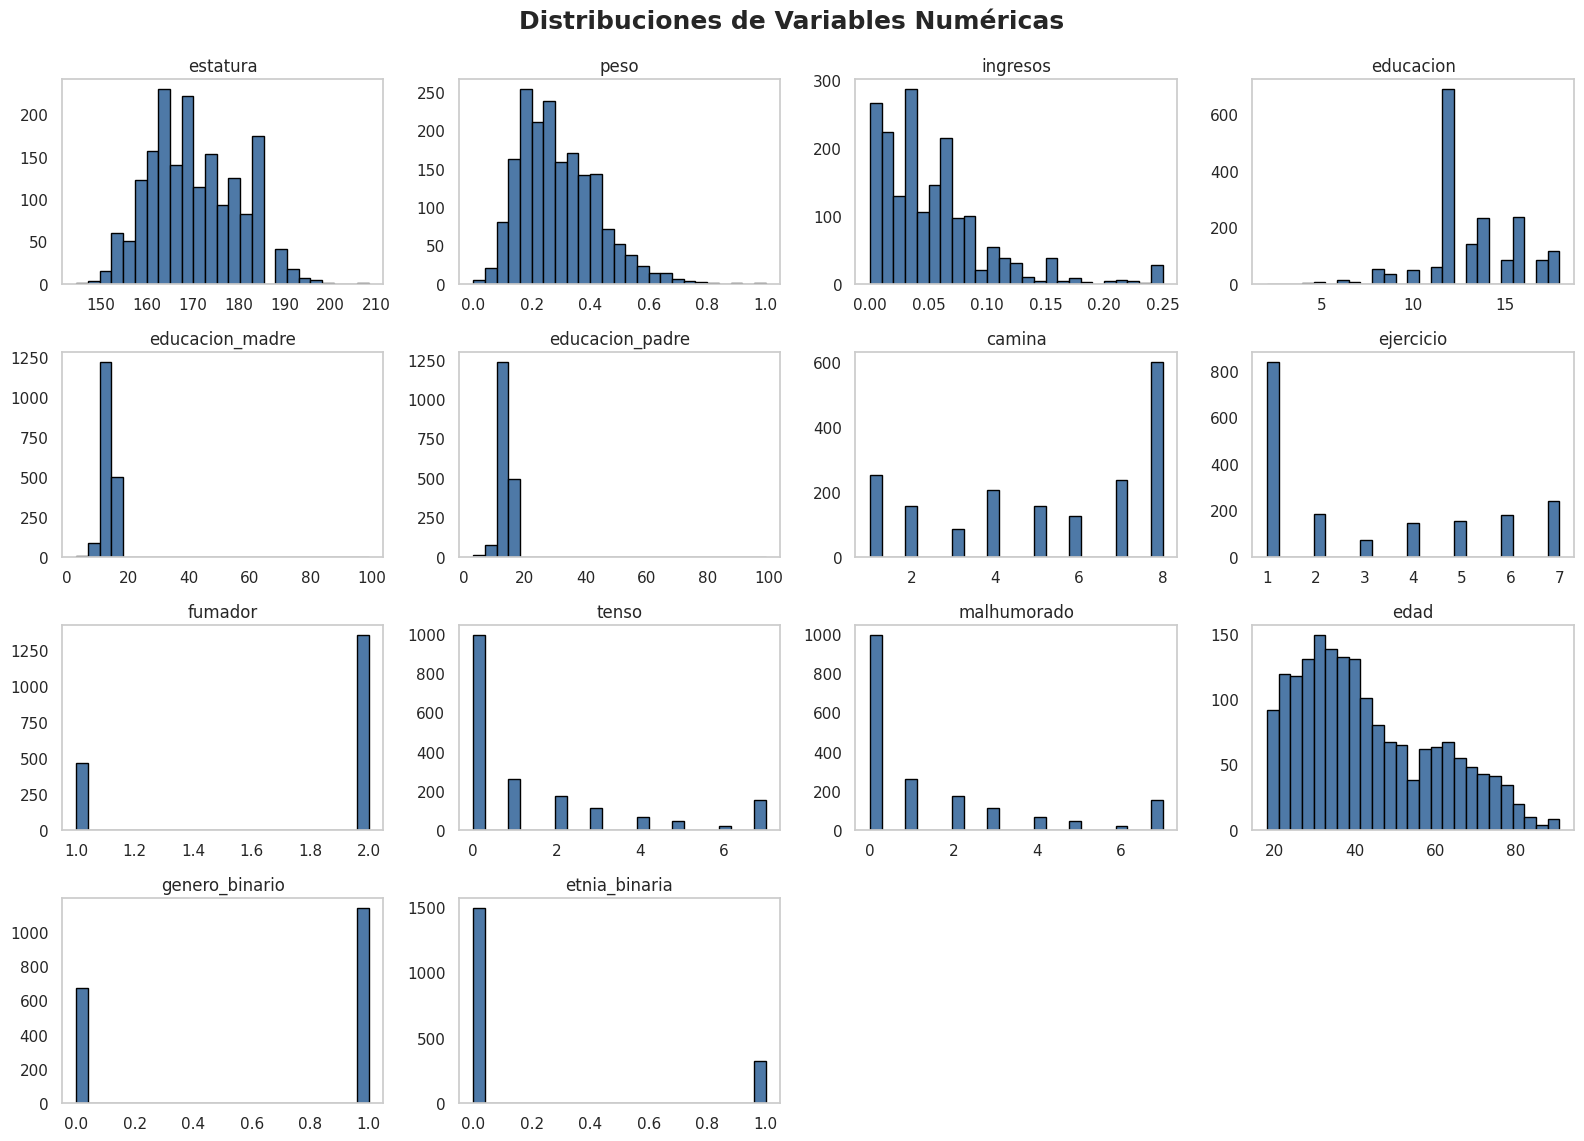

In [11]:
#@title Distribución de Variables Numéricas

# Crear histogramas para visualizar distribuciones con mejoras estéticas
plt.figure(figsize=(16, 12))
df.hist(
    bins=25,                  # Ajustar el número de bins para mayor detalle
    figsize=(16, 12),         # Tamaño del gráfico
    color='#4E79A7',          # Color de las barras
    edgecolor='black',        # Color del borde de las barras
    grid=False                # Desactivar la cuadrícula
)

# Agregar un título principal al gráfico
plt.suptitle(
    "Distribuciones de Variables Numéricas",
    fontsize=18,
    fontweight='bold',
    y=0.95
)

# Ajustar diseño y mostrar los histogramas
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


1. **Estatura y Peso**
Estatura: Distribución sesgada ligeramente hacia la derecha.
La mayoría de las personas tienen una estatura entre 160 cm y 180 cm.
Valores extremos están presentes, pero no son muy comunes.
Peso: Distribución similar, con más personas entre 50 kg y 80 kg.
2. **Ingresos**: Distribución altamente sesgada a la derecha (asimetría positiva).
La mayoría de las personas tienen ingresos bajos (menos de 25,000).
Los ingresos altos (por encima de 75,000) son raros.
3. **Educación, Educación Madre y Padre**
Educación: Distribución simétrica, con picos alrededor de 12 años de educación.
4. **Camina y Ejercicio**
Camina: Personas distribuidas en todos los rangos de esta variable.
Ejercicio: Parece estar más concentrado en los valores bajos o menos actividad física diaria.
5. **Fumador, Tenso y Malhumorado**
Fumador: La mayoría de las personas pertenecen a la categoría  no fumadores.
Tenso y Malhumorado: Ambos tienen distribuciones similares con varias categorías. La mayoría parecen caer en p personas menos tensas o malhumoradas.
6. **Edad**: Distribución sesgada a la derecha. La mayoría de las personas tienen entre 20 y 50 años. Muy pocas personas mayores de 80 años.
7. **Género y Etnia**
Género Masculino: Tiene un ligero sesgo hacia la categoría masculina.
Etnia: La mayoría de las personas se identifican como "Blanco". Los grupos "Latino" y "Otro" son mucho más pequeños.

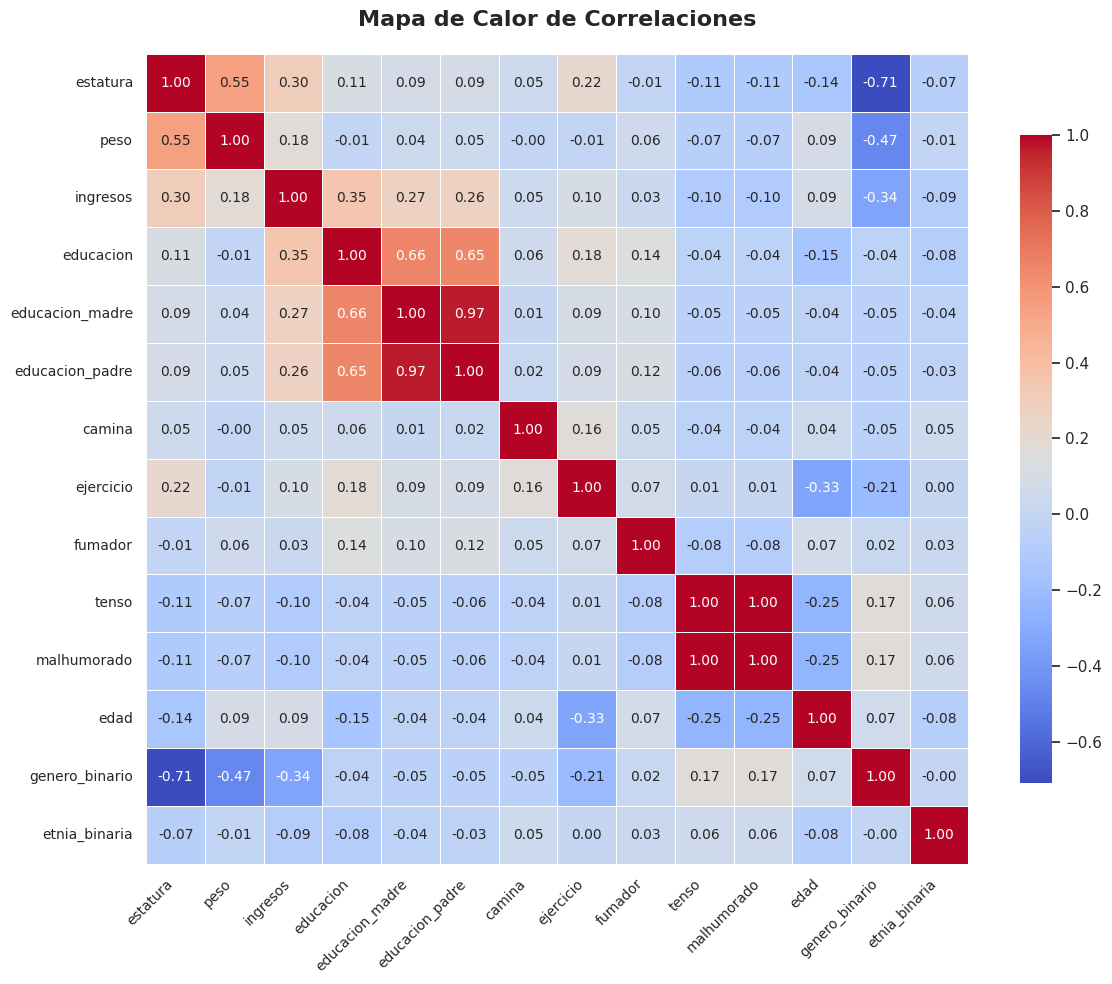

Correlaciones más altas con 'ingresos':
ingresos           1.000000
educacion          0.348987
estatura           0.298567
educacion_madre    0.266215
educacion_padre    0.262703
peso               0.180952
ejercicio          0.104843
edad               0.090973
camina             0.051144
fumador            0.032245
etnia_binaria     -0.085518
tenso             -0.102630
malhumorado       -0.102630
genero_binario    -0.335608
Name: ingresos, dtype: float64


In [12]:
#@title Mapa de calor de correlaciones
# Seleccionar solo columnas numéricas del DataFrame
df_numerico = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = df_numerico.corr()

# Crear el mapa de calor con mejoras estéticas
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,               # Mostrar los valores dentro de las celdas
    fmt=".2f",                # Formato de los valores
    cmap="coolwarm",          # Esquema de colores
    cbar_kws={"shrink": 0.8}, # Tamaño de la barra de color
    linewidths=0.5,           # Líneas entre celdas
    annot_kws={"size": 10}    # Tamaño de los valores dentro de las celdas
)


#Mejora estetica del mapa de calor

heatmap.set_title(
    "Mapa de Calor de Correlaciones",
    fontdict={"fontsize": 16, "fontweight": "bold"},
    pad=20
)
plt.xticks(fontsize=10, rotation=45, ha="right")
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()

# Mostrar el mapa de calor
plt.show()

# Relaciones destacadas con la variable 'ingresos'
print("Correlaciones más altas con 'ingresos':")
print(correlation_matrix['ingresos'].sort_values(ascending=False))



In [13]:
#@title Interpretación del Mapa de Calor de Correlaciones
# Imprimir las correlaciones numéricas ordenadas para ayudar en la interpretación
correlaciones = df_numerico.corr()

# Mostrar las correlaciones más altas con respecto a "ingresos"
print("Correlaciones más altas con 'ingresos':")
print(correlaciones['ingresos'].sort_values(ascending=False))

# Relaciones destacadas del mapa de calor
print("\nRelaciones destacadas:")
print("- 'educacion' con 'educacion_madre': {:.2f}".format(correlaciones.loc['educacion', 'educacion_madre']))
print("- 'educacion' con 'educacion_padre': {:.2f}".format(correlaciones.loc['educacion', 'educacion_padre']))
print("- 'educacion_madre' con 'educacion_padre': {:.2f}".format(correlaciones.loc['educacion_madre', 'educacion_padre']))




Correlaciones más altas con 'ingresos':
ingresos           1.000000
educacion          0.348987
estatura           0.298567
educacion_madre    0.266215
educacion_padre    0.262703
peso               0.180952
ejercicio          0.104843
edad               0.090973
camina             0.051144
fumador            0.032245
etnia_binaria     -0.085518
tenso             -0.102630
malhumorado       -0.102630
genero_binario    -0.335608
Name: ingresos, dtype: float64

Relaciones destacadas:
- 'educacion' con 'educacion_madre': 0.66
- 'educacion' con 'educacion_padre': 0.65
- 'educacion_madre' con 'educacion_padre': 0.97
